In [1]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Research\JRF\1_PAPER\2_Analysis")
print(os.getcwd())

E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Research\JRF\1_PAPER\2_Analysis


In [2]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4
from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import cartopy.feature as cfeature
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors
import scienceplots
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches  # For creating country legend handles
from matplotlib.patches import Circle
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy

#Trend
import xarrayMannKendall as XMK
import dask
from dask import delayed
import graphviz

# Styling and font settings
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-white')

C:\Users\sstar\AppData\Local\Temp\ipykernel_1748\4121256301.py:49: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [3]:
ds=xr.open_mfdataset('DATA_p/Physiography/1_texture_classes.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
ds=ds.isel(x=np.arange(1,len(ds.x.values),3),y=np.arange(1,len(ds.y.values),3))

basin_map = gpd.read_file('DATA_r/shapefiles_new/IndiShape/IndShape.shp')
riv_map = gpd.read_file('DATA_r/shapefiles_new/India_streams/India_stream.shp')
ind_map=gpd.read_file('DATA_r/shapefiles_new/india_admin/Country/India_country.shp')
south_asia=gpd.read_file('DATA_p/shapefile/south_asia_p.shp')



## 1_Texture map plot



In [4]:
ds_txt=ds['Texture_class'].to_dataset()

#Note: the plots only accept numerical data, so convert these into numerical
soil_type = ['Sand','Sandy Loam','Loamy Sand','Loam','Silt Loam','Clay Loam','Silty Clay Loam','Silty Clay loam','Silt','Sandy Clay','Silt Clay','Clay','other']
clss=list(np.arange(1,len(soil_type),1))+[np.nan]

soil_clss=dict(zip(soil_type,clss))


vectorized_map=np.vectorize(soil_clss.get)
ds_new = vectorized_map(ds_txt['Texture_class'].compute())

# storing the numpy to dataset
ds_txt['class'] = (('y', 'x'), ds_new)


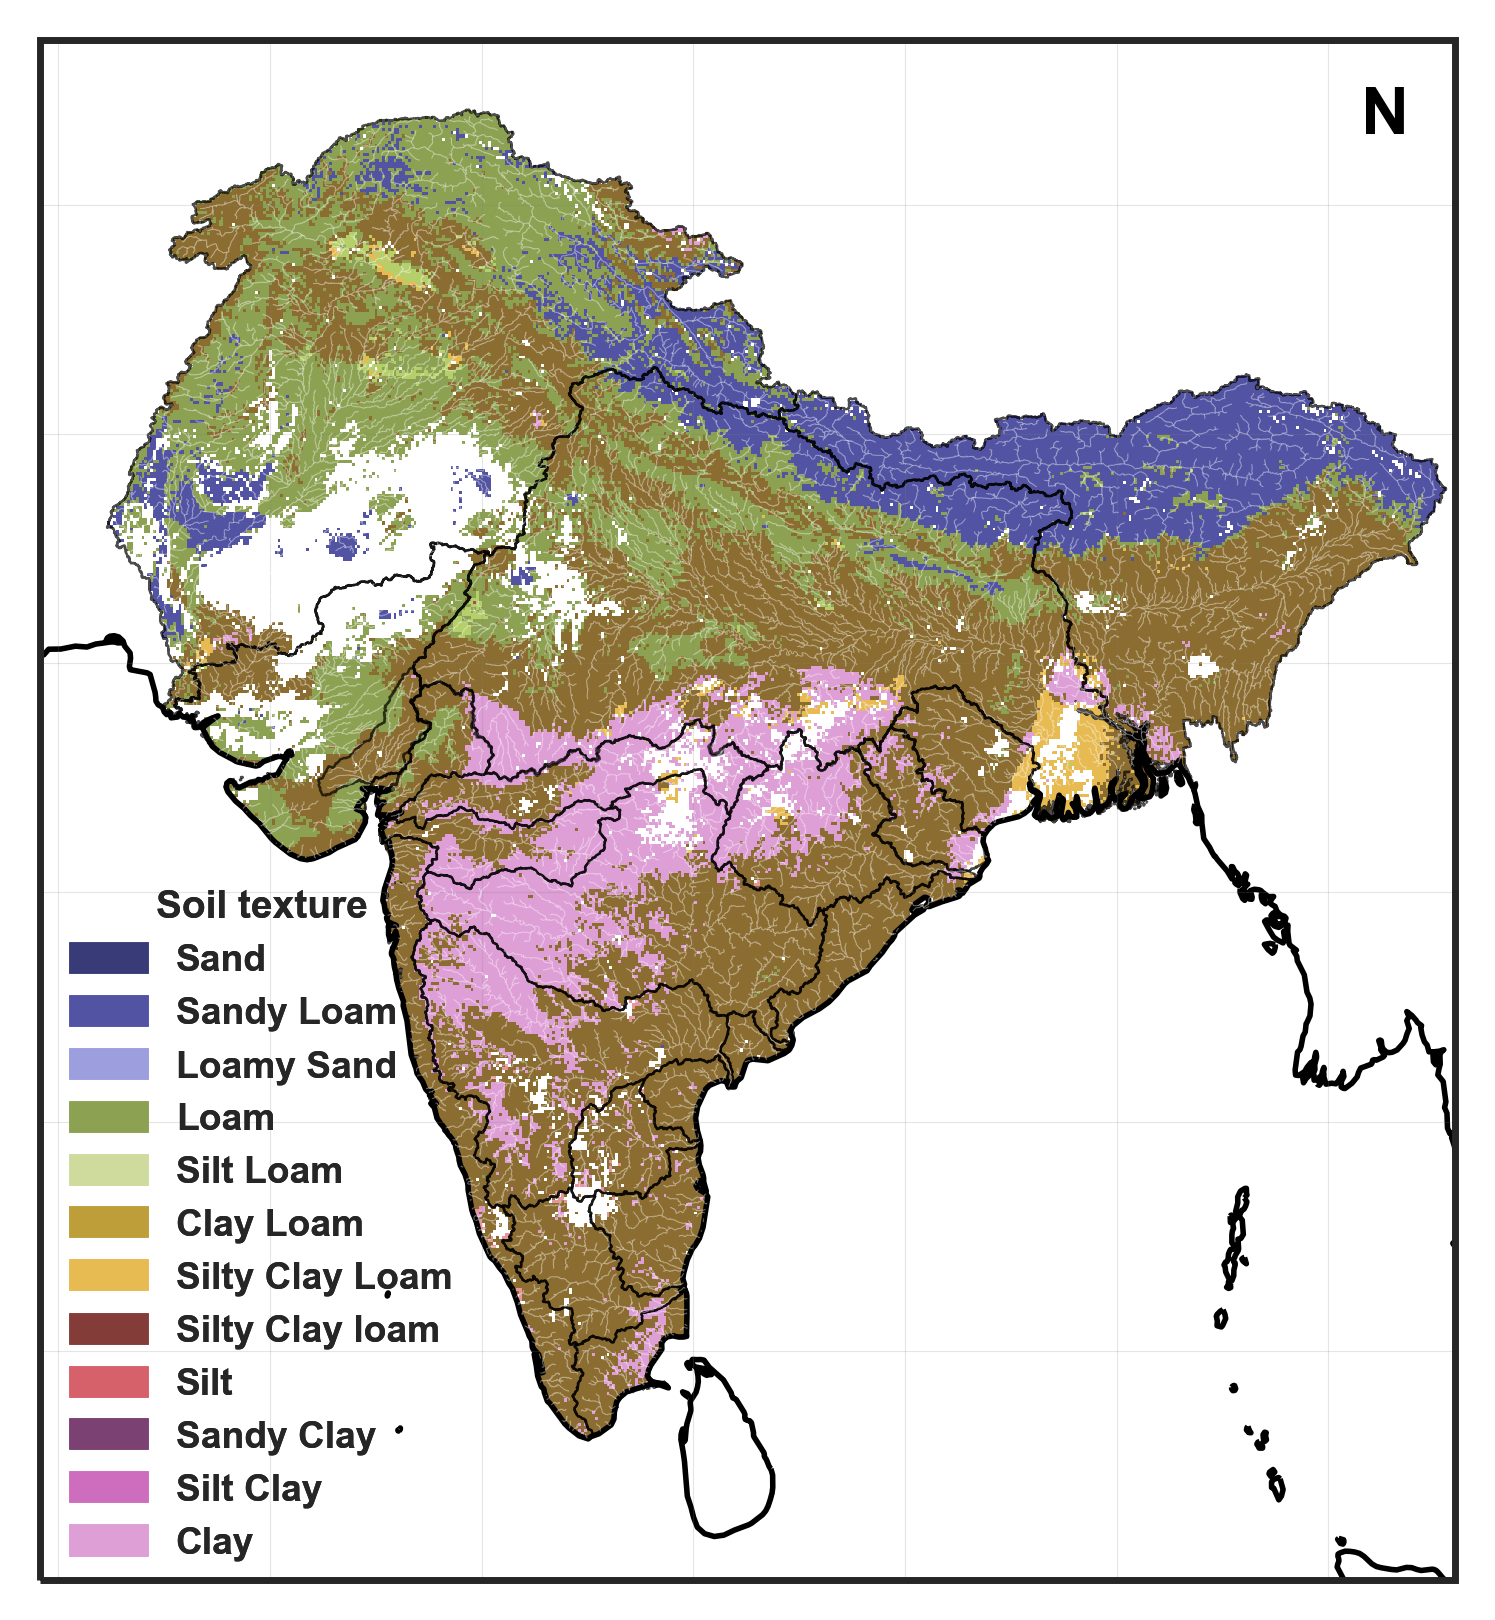

In [13]:

num_colors = 50
marker_size = 6
marker_size2 = 5
alp = 0.1
alph = 0.05
basinEdge = 'black'
basinEdge1 = 'blue'
basinLine = 0.35

# Creating the map plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={"projection": ccrs.PlateCarree()},
                       dpi=400, facecolor='white', constrained_layout=False)

ax.set_extent([64.571, 98, 5, 38.599], ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.2, color='grey', alpha=0.2, linestyle='-')


south_asia = south_asia.to_crs(ccrs.PlateCarree().proj4_init)


# Plot countries and rivers
num_classes=12
cmap = plt.get_cmap('tab20b')  # You can also try 'tab20c' or 'Set3'
colors = cmap(np.linspace(0, 1, num_classes))#
bounds = list(range(1, num_classes + 2))  # [1, 2, 3, ..., 12, 13]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

ds_txt['class'].plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)
south_asia.plot(ax=ax, cmap=None, facecolor='none', edgecolor=basinEdge, linewidth=basinLine * 1.2, alpha=0.7)
riv_map.plot(ax=ax, color='white', alpha=0.4, linewidth=basinLine * 0.5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
#ax.add_feature(cfeature.OCEAN, color='lightblue')

# Add North arrow
ax.text(0.95, 0.95, 'N', fontsize=12, fontweight='bold', transform=ax.transAxes, ha='center', va='center', color='black')

# Country legend (with colored patches for each country)
legend_handles = [mpatches.Patch(color=colors[i], label=soil_type[i]) for i in range(num_classes)]
lg=ax.legend(handles=legend_handles, bbox_to_anchor=(0.315, 0.47), fontsize=6.7, title='Soil texture', title_fontsize=7)
ax.add_artist(lg)


# Save the plot
plt.savefig("soil texture.jpeg")


### 2_HSG classification

C:\Users\sstar\AppData\Local\Temp\ipykernel_1748\874890507.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


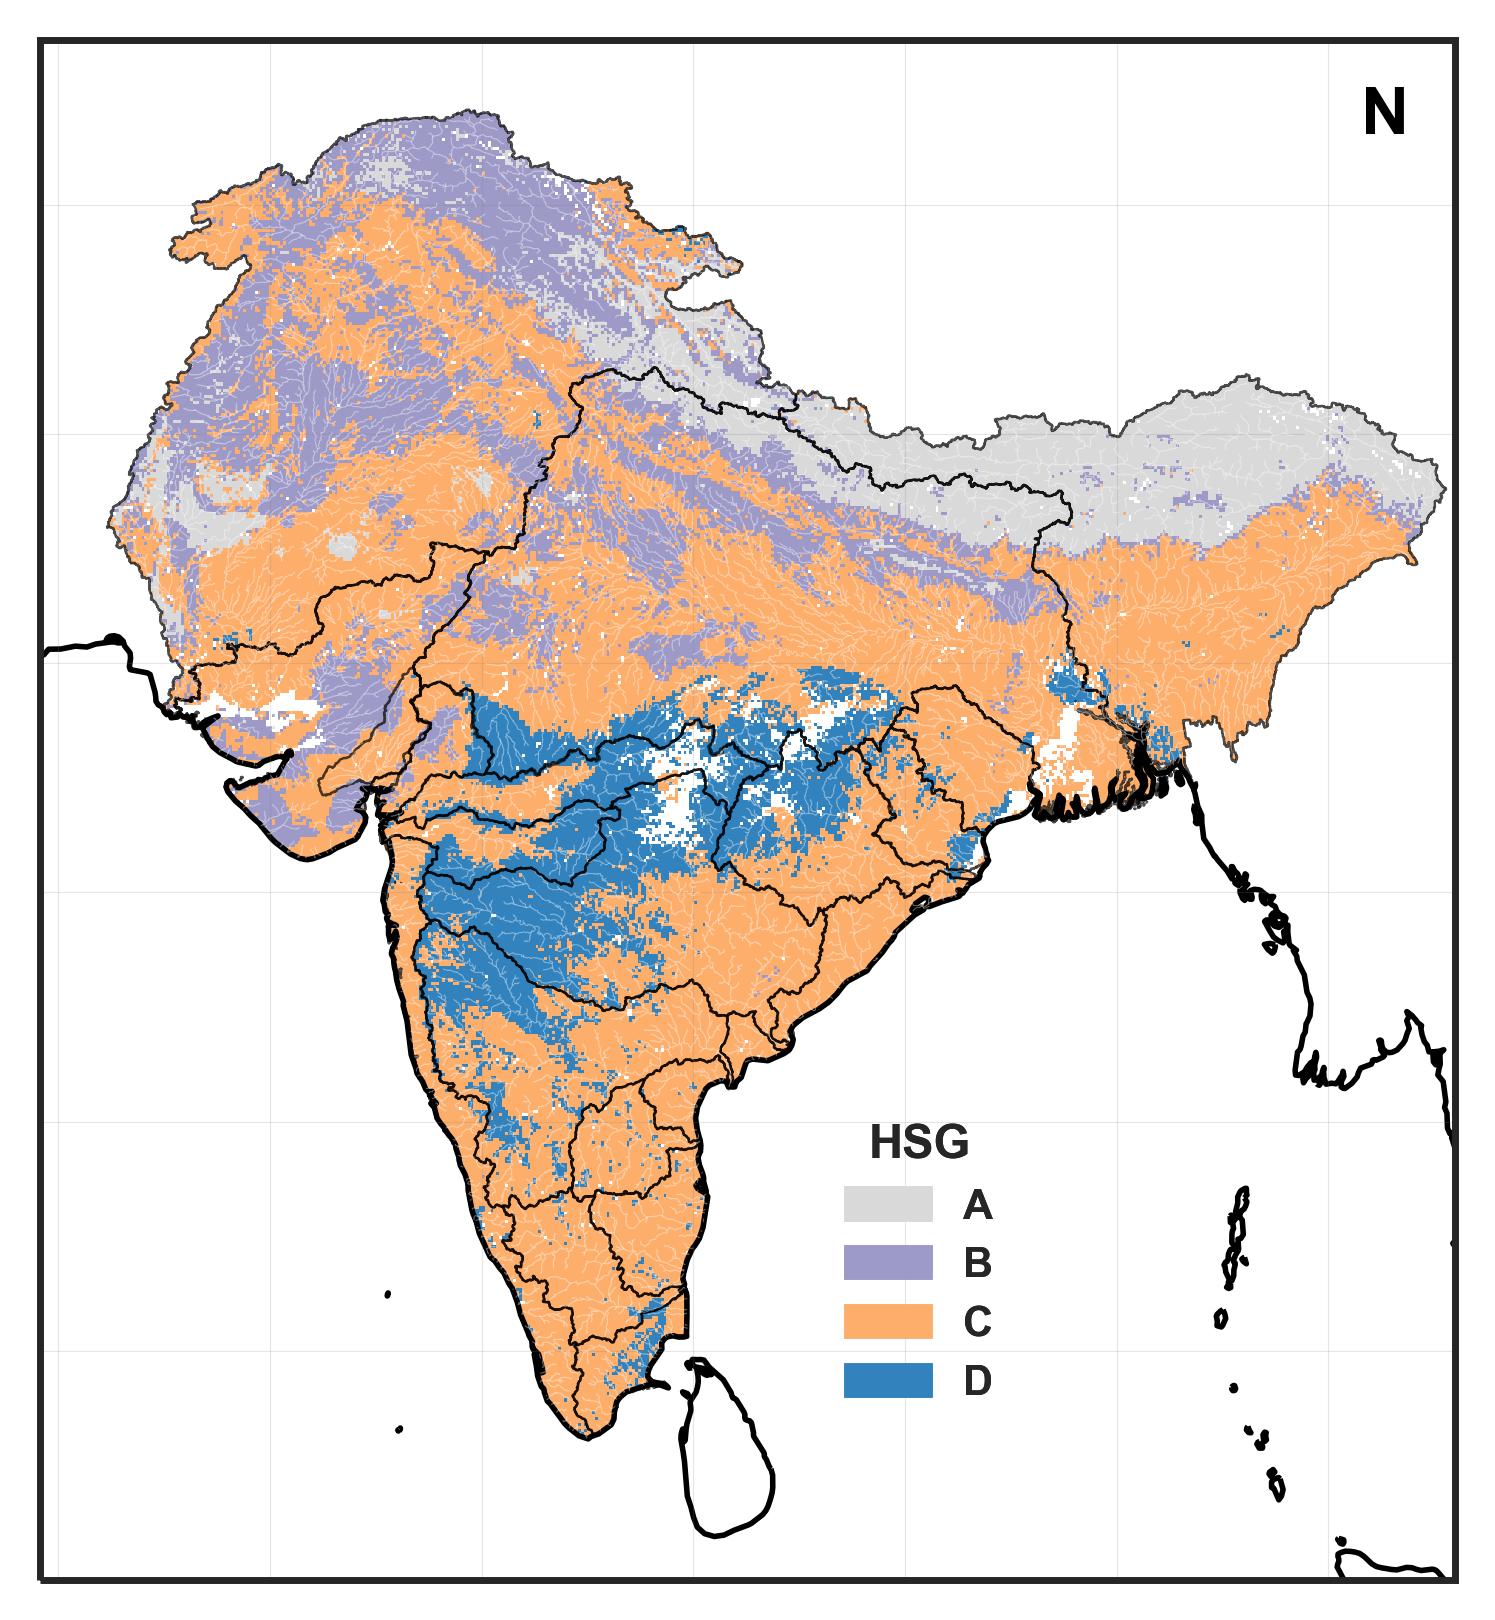

: 

In [14]:
ds_hsg=ds['HSG_class']

hsg=['A','B','C','D']


# Styling and font settings
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-white')

num_colors = 50
marker_size = 6
marker_size2 = 5
alp = 0.1
alph = 0.05
basinEdge = 'black'
basinEdge1 = 'blue'
basinLine = 0.35

# Creating the map plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={"projection": ccrs.PlateCarree()},
                       dpi=400, facecolor='white', constrained_layout=False)

ax.set_extent([64.571, 98, 5, 38.599], ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.2, color='grey', alpha=0.2, linestyle='-')


south_asia = south_asia.to_crs(ccrs.PlateCarree().proj4_init)


# Plots
col=['blue', 'green', 'yellow', 'red']
cmap = mcolors.ListedColormap(col)
bounds = [1,2,3,4,5]  # Boundaries for the different classes
norm = mcolors.BoundaryNorm(bounds, cmap.N)

num_classes=4
cmap = plt.get_cmap('tab20c_r')
colors = cmap(np.linspace(0, 1, num_classes))#
bounds = list(range(1, num_classes + 2))  # [1, 2, 3, ..., 12, 13]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

ds_hsg.plot(ax=ax, cmap=cmap, add_colorbar=False)
south_asia.plot(ax=ax, cmap=None, facecolor='none', edgecolor=basinEdge, linewidth=basinLine * 1.2, alpha=0.7)
riv_map.plot(ax=ax, color='white', alpha=0.4, linewidth=basinLine * 0.5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
#ax.add_feature(cfeature.OCEAN, color='lightblue')

# Add North arrow
ax.text(0.95, 0.95, 'N', fontsize=12, fontweight='bold', transform=ax.transAxes, ha='center', va='center', color='black')
#ax.text(0.1, 0.95, 'a)', fontsize=10, fontweight='bold', transform=ax.transAxes, ha='center', va='center', color='black')

# Country legend (with colored patches for each country)
country_legend_handles = [mpatches.Patch(color=colors[i], label=hsg[i]) for i in range(4)]
country_legend = ax.legend(handles=country_legend_handles, bbox_to_anchor=(0.70, 0.32), fontsize=7.5, title='HSG', title_fontsize=8.5)
ax.add_artist(country_legend)



# Save the plot
plt.savefig("HSG_group.jpeg")

